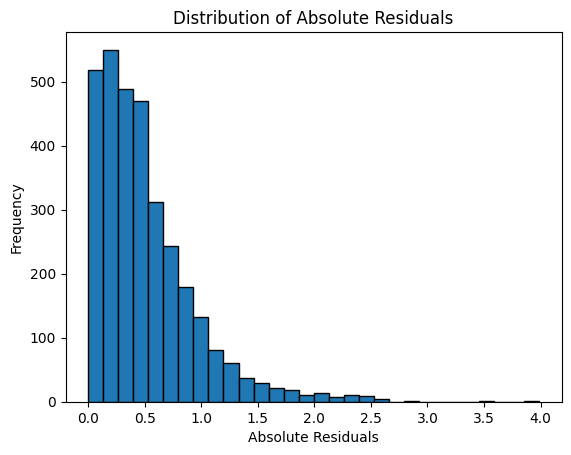

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import math
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

data = pd.read_csv("winequality-red.csv", sep=';')

X = data.drop("quality", axis=1)
y = data["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

residuals = []
y_preds = []


for run in range(1, 11):
    mlp = MLPRegressor(hidden_layer_sizes=(10, 10), activation="relu", early_stopping=True, validation_fraction=0.2, random_state=run)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    y_preds.append(y_pred)
    residuals.extend(np.abs(y_test - y_pred))

plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Absolute Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Absolute Residuals')
plt.show()



In [2]:
#2

m_residues = []

rd_pred = np.round(y_preds)
bd_pred = np.clip(rd_pred, y.min(), y.max())

for pred in bd_pred:
    m_residues.extend(np.abs(y_test - pred))

print(f"Original MAE: {np.mean(residuals)}")
print(f"Rounded and Bounded MAE: {np.mean(m_residues)}")



Original MAE: 0.5097171955009514
Rounded and Bounded MAE: 0.43875


RMSE with 20 iterations: 1.403978950992544
RMSE with 50 iterations: 0.7996073631460567
RMSE with 100 iterations: 0.6940361469112146
RMSE with 200 iterations: 0.6554543932216473


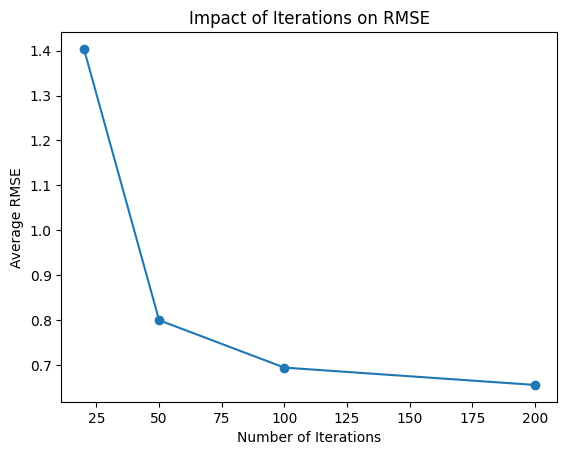

In [4]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

rmse_scores = []

iterations_list = [20, 50, 100, 200]

for num_iterations in iterations_list:
    rmse = 0.0
    
    for run in range(1, 11):
        mlp = MLPRegressor(hidden_layer_sizes=(10, 10), activation="relu", max_iter=num_iterations, random_state=run)
        mlp.fit(X_train, y_train)
        y_pred = mlp.predict(X_test)
        rmse += math.sqrt(mean_squared_error(y_test, y_pred))

    average_rmse = rmse / 10
    rmse_scores.append(average_rmse)

for i, num_iterations in enumerate(iterations_list):
    print(f"RMSE with {num_iterations} iterations: {rmse_scores[i]}")

plt.plot(iterations_list, rmse_scores, marker='o')
plt.xlabel('Number of Iterations')
plt.ylabel('Average RMSE')
plt.title('Impact of Iterations on RMSE')
plt.show()
